<div align='center'>
    <h1>Projek Tugas Besar Dasar Kecerdasan Artifisial</h1>
    <h3>Penentuan Tingkat Risiko Diabetes Berdasarkan Gejala Pasien</h3>
</div>

<div align="center">
    <p>Muhammad Azigha Azhar (103012300143)</p>
    <p>Ahmad Raffi Arasy (103012330207)</p>
    <p>Axel Davin Lazar Panenggak (103012330386)</p>
</div>

In [86]:
import numpy as np
import pandas as pd
import os
import kagglehub
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [87]:
#Unduh dataset Pima Indians Diabetes
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path ke dataset:", path)


Path ke dataset: C:\Users\ekada\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [88]:
#Tampilkan isi folder dan baca file CSV
for file in os.listdir(path):
    print(file)

df = pd.read_csv(os.path.join(path, 'diabetes.csv'))
df.head(20)


diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [89]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())

In [90]:
data = df[['Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
data.head(20)

,Age,BMI,Glucose,DiabetesPedigreeFunction,Outcome
0,50,33.6,148,0.627,1
1,31,26.6,85,0.351,0
2,32,23.3,183,0.672,1
3,21,28.1,89,0.167,0
4,33,43.1,137,2.288,1
5,30,25.6,116,0.201,0
6,26,31.0,78,0.248,1
7,29,35.3,115,0.134,0
8,53,30.5,197,0.158,1
9,54,32.0,125,0.232,1


In [91]:
#Pilih fitur yang digunakan dalam fuzzy
df_fuzzy = df[['Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
df_fuzzy.describe()

,Age,BMI,Glucose,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,32.450911,121.656250,0.471876,0.348958
std,11.760232,6.875366,30.438286,0.331329,0.476951
min,21.000000,18.200000,44.000000,0.078000,0.000000
25%,24.000000,27.500000,99.750000,0.243750,0.000000
50%,29.000000,32.000000,117.000000,0.372500,0.000000
75%,41.000000,36.600000,140.250000,0.626250,1.000000
max,81.000000,67.100000,199.000000,2.420000,1.000000


In [92]:
#  Definisikan input (Antecedent) dan output (Consequent)
glucose = ctrl.Antecedent(np.arange(0, 201, 1), 'glucose')
bmi = ctrl.Antecedent(np.arange(0, 51, 1), 'bmi')
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
pedigree = ctrl.Antecedent(np.arange(0, 2.6, 0.1), 'pedigree')
risk = ctrl.Consequent(np.arange(0, 2, 1), 'risk')

#  Fungsi keanggotaan untuk glucose
glucose['normal'] = fuzz.trimf(glucose.universe, [0, 90, 100])
glucose['pre_diabetes'] = fuzz.trimf(glucose.universe, [90, 115, 125])
glucose['tinggi'] = fuzz.trimf(glucose.universe, [120, 160, 200])

#  Fungsi keanggotaan untuk BMI
bmi['normal'] = fuzz.trimf(bmi.universe, [0, 18.5, 24.9])
bmi['gemuk'] = fuzz.trimf(bmi.universe, [23, 27, 30])
bmi['obesitas'] = fuzz.trimf(bmi.universe, [28, 40, 50])

#  Fungsi keanggotaan untuk usia
age['muda'] = fuzz.trimf(age.universe, [0, 20, 30])
age['dewasa'] = fuzz.trimf(age.universe, [25, 40, 55])
age['tua'] = fuzz.trimf(age.universe, [50, 75, 100])

#  Fungsi keanggotaan untuk pedigree (riwayat keluarga)
pedigree['rendah'] = fuzz.trimf(pedigree.universe, [0.0, 0.3, 0.6])
pedigree['sedang'] = fuzz.trimf(pedigree.universe, [0.5, 1.0, 1.5])
pedigree['tinggi'] = fuzz.trimf(pedigree.universe, [1.3, 1.8, 2.5])

#  Fungsi keanggotaan untuk output risk
risk['non_diabet'] = fuzz.trimf(risk.universe, [0, 0, 1])
risk['diabet'] = fuzz.trimf(risk.universe, [0, 1, 1])


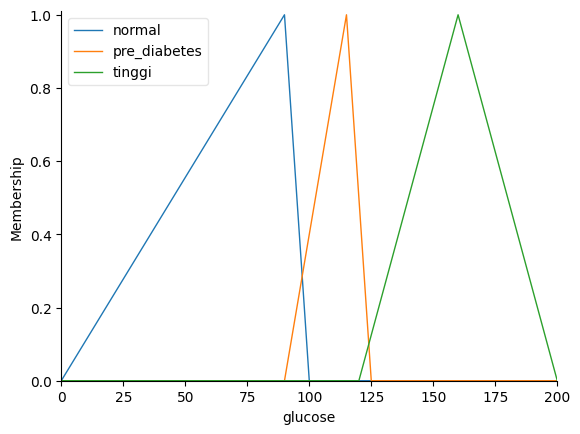

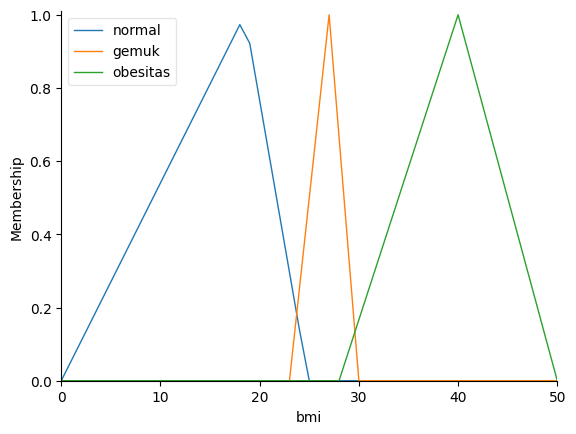

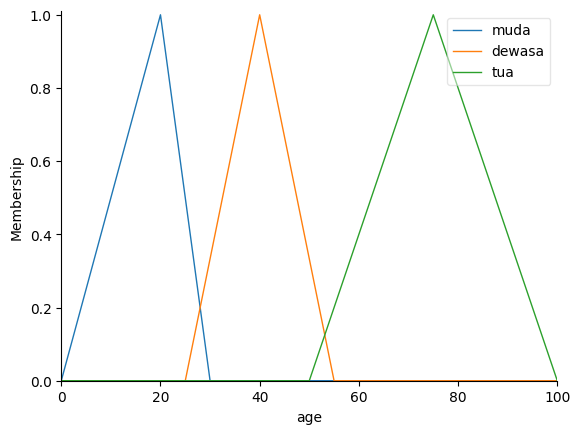

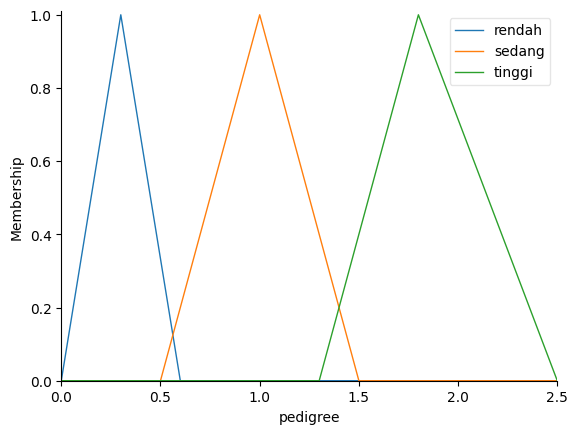

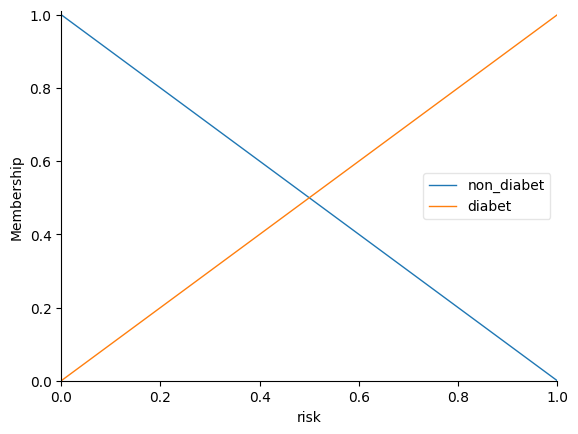

In [94]:
# 📊 Tampilkan grafik fungsi keanggotaan
glucose.view()
bmi.view()
age.view()
pedigree.view()
risk.view()


In [95]:
#  Aturan fuzzy Mamdani
rule1 = ctrl.Rule(glucose['tinggi'] & bmi['obesitas'] & pedigree['tinggi'] & age['tua'], risk['diabet'])
rule2 = ctrl.Rule(glucose['pre_diabetes'] & bmi['gemuk'] & pedigree['sedang'] & age['dewasa'], risk['diabet'])
rule3 = ctrl.Rule(glucose['normal'] & bmi['normal'] & pedigree['rendah'] & age['muda'], risk['non_diabet'])
rule4 = ctrl.Rule(glucose['tinggi'] & bmi['gemuk'] & age['tua'], risk['diabet'])  # tambah BMI
rule5 = ctrl.Rule(glucose['normal'] & age['muda'] & bmi['normal'] & pedigree['rendah'], risk['non_diabet'])
rule6 = ctrl.Rule(glucose['pre_diabetes'] & age['dewasa'] & bmi['gemuk'], risk['diabet'])  # tambah BMI
rule7 = ctrl.Rule(bmi['obesitas'] & pedigree['tinggi'] & glucose['tinggi'], risk['diabet'])  # tambah glucose
rule8 = ctrl.Rule(age['tua'] & pedigree['tinggi'] & bmi['gemuk'], risk['diabet'])  # tambah BMI
rule9 = ctrl.Rule(age['muda'] & glucose['normal'] & pedigree['rendah'] & bmi['normal'], risk['non_diabet'])
rule10 = ctrl.Rule(glucose['tinggi'] & bmi['gemuk'] & age['dewasa'], risk['diabet'])  # tambah age
rule11 = ctrl.Rule(glucose['pre_diabetes'] & pedigree['tinggi'] & age['dewasa'], risk['diabet'])  # tambah age
rule12 = ctrl.Rule(glucose['tinggi'] & bmi['obesitas'] & pedigree['sedang'] & age['tua'], risk['diabet'])
rule13 = ctrl.Rule(glucose['normal'] & bmi['gemuk'] & pedigree['rendah'] & age['dewasa'], risk['non_diabet'])
rule14 = ctrl.Rule(glucose['tinggi'] & bmi['normal'] & pedigree['tinggi'] & age['tua'], risk['diabet'])
rule15 = ctrl.Rule(glucose['normal'] & bmi['normal'] & pedigree['sedang'] & age['muda'], risk['non_diabet'])
rule16 = ctrl.Rule(glucose['pre_diabetes'] & bmi['obesitas'] & pedigree['tinggi'] & age['tua'], risk['diabet'])

In [96]:
# Tambahkan ke sistem kontrol
risk_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6,
    rule7, rule8, rule9, rule10, rule11,
    rule12, rule13, rule14, rule15, rule16
])

# Buat objek simulasi
mamdani_sim = ctrl.ControlSystemSimulation(risk_ctrl)



In [97]:
# Beri input yang jelas aktif pada semua fuzzy set
mamdani_sim.input['glucose'] = 150    # masuk 'tinggi'
mamdani_sim.input['bmi'] = 35         # masuk 'obesitas'
mamdani_sim.input['age'] = 65         # masuk 'tua'
mamdani_sim.input['pedigree'] = 1.8   # masuk 'tinggi'

# Menjalankan sistem fuzzy
mamdani_sim.compute()

# Tampilkan output
hasil_risk = mamdani_sim.output['risk']
print("Output fuzzy (nilai risk):", hasil_risk)

if hasil_risk >= 0.5:
    print("Prediksi: Penderita Diabetes (1)")
else:
    print("Prediksi: Tidak Penderita Diabetes (0)")

Output fuzzy (nilai risk): 0.6258169934640524
Prediksi: Penderita Diabetes (1)


In [98]:
# Fungsi keanggotaan triangular manual
def trimf(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Keanggotaan Glucose
def glucose_membership(value):
    return {
        'normal': trimf(value, 0, 90, 100),
        'pre_diabetes': trimf(value, 90, 115, 125),
        'tinggi': trimf(value, 120, 160, 200)
    }

# BMI
def bmi_membership(value):
    return {
        'normal': trimf(value, 0, 18.5, 24.9),
        'gemuk': trimf(value, 23, 27, 30),
        'obesitas': trimf(value, 28, 40, 50)
    }

# Pedigree
def pedigree_membership(value):
    return {
        'rendah': trimf(value, 0.0, 0.3, 0.6),
        'sedang': trimf(value, 0.5, 1.0, 1.5),
        'tinggi': trimf(value, 1.3, 1.8, 2.5)
    }

def age_membership(value):
    return {
        'muda': trimf(value, 0, 20, 30),
        'dewasa': trimf(value, 25, 40, 55),
        'tua': trimf(value, 50, 75, 100)
    }

In [99]:
# Daftar aturan: (glucose_set, bmi_set, pedigree_set, output_risk)
# Revisi output: 1 = diabetes, 0 = tidak diabetes
# (glucose_set, bmi_set, pedigree_set, age_set, output)
sugeno_rules = [
    # Tinggi risiko diabetes
    ('tinggi', 'obesitas', 'tinggi', 'tua', 1),
    ('tinggi', 'obesitas', 'sedang', 'tua', 1),
    ('tinggi', 'gemuk', 'tinggi', 'dewasa', 1),
    ('tinggi', 'gemuk', 'sedang', 'tua', 1),
    ('pre_diabetes', 'obesitas', 'tinggi', 'tua', 1),
    ('pre_diabetes', 'gemuk', 'tinggi', 'dewasa', 1),
    ('pre_diabetes', 'obesitas', 'sedang', 'dewasa', 1),
    ('tinggi', 'gemuk', 'sedang', 'dewasa', 1),
    ('tinggi', 'obesitas', 'rendah', 'tua', 1),

    # Risiko sedang atau rendah
    ('pre_diabetes', 'normal', 'rendah', 'dewasa', 0),
    ('pre_diabetes', 'normal', 'sedang', 'muda', 0),
    ('normal', 'gemuk', 'rendah', 'muda', 0),
    ('normal', 'normal', 'rendah', 'muda', 0),
    ('normal', 'normal', 'sedang', 'muda', 0),
    ('normal', 'gemuk', 'sedang', 'muda', 0),
    ('normal', 'obesitas', 'rendah', 'dewasa', 0),
    ('pre_diabetes', 'gemuk', 'rendah', 'muda', 0),

    # Cakupan untuk orang tua dengan normal glucose tapi tinggi pedigree
    ('normal', 'normal', 'tinggi', 'tua', 1),
    ('pre_diabetes', 'gemuk', 'tinggi', 'tua', 1),
    ('tinggi', 'normal', 'sedang', 'dewasa', 1),

    # ini kondisi kalo masi abu-abu
    ('pre_diabetes', 'gemuk', 'sedang', 'tua', 1),
    ('normal', 'obesitas', 'tinggi', 'tua', 1),
    ('pre_diabetes', 'obesitas', 'sedang', 'dewasa', 1),
    ('normal', 'gemuk', 'sedang', 'tua', 1),
]


# Fungsi evaluasi Sugeno
def sugeno_infer(glucose_val, bmi_val, pedigree_val, age_val):
    g = glucose_membership(glucose_val)
    b = bmi_membership(bmi_val)
    p = pedigree_membership(pedigree_val)
    a = age_membership(age_val)

    numerator = 0
    denominator = 0

    for rule in sugeno_rules:
        g_label, b_label, p_label, a_label, output = rule
        w = min(g[g_label], b[b_label], p[p_label], a[a_label])
        numerator += w * output
        denominator += w

    if denominator == 0:
        return None
    return numerator / denominator


In [100]:
# Uji sistem Sugeno dengan data input
glucose_input = 150
bmi_input = 35
pedigree_input = 1.8
age_input = 65

result = sugeno_infer(glucose_input, bmi_input, pedigree_input, age_input)
print("Output fuzzy Sugeno (nilai prediksi):", result)

if result is not None:
    if result >= 0.5:
        print("Prediksi: Penderita Diabetes (1)")
    else:
        print("Prediksi: Tidak Penderita Diabetes (0)")
else:
    print("Prediksi: Tidak dapat ditentukan (nilai nol pada semua keanggotaan)")


Output fuzzy Sugeno (nilai prediksi): 1.0
Prediksi: Penderita Diabetes (1)


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fungsi prediksi Mamdani untuk satu baris data
def predict_mamdani(glucose_val, bmi_val, age_val, pedigree_val):
    try:
        sim = ctrl.ControlSystemSimulation(risk_ctrl) 
        mamdani_sim.input['glucose'] = glucose_val
        mamdani_sim.input['bmi'] = bmi_val
        mamdani_sim.input['age'] = age_val
        mamdani_sim.input['pedigree'] = pedigree_val
        mamdani_sim.compute()
        output = mamdani_sim.output['risk']
        return 1 if output >= 0.5 else 0
    except:
        return 0  # fallback jika error


In [116]:
# Prediksi untuk semua data menggunakan Mamdani
mamdani_preds = []

for idx, row in df.iterrows():
    pred = predict_mamdani(
        glucose_val=row['Glucose'],
        bmi_val=row['BMI'],
        age_val=row['Age'],
        pedigree_val=row['DiabetesPedigreeFunction']
    )
    mamdani_preds.append(pred)

df['Mamdani_Pred'] = mamdani_preds


In [117]:
# Prediksi untuk semua data menggunakan Sugeno
sugeno_preds = []

for idx, row in df.iterrows():
    result = sugeno_infer(
        glucose_val=row['Glucose'],
        bmi_val=row['BMI'],
        pedigree_val=row['DiabetesPedigreeFunction'],
        age_val=row['Age']
    )
    pred = 1 if result is not None and result >= 0.5 else 0
    sugeno_preds.append(pred)

df['Sugeno_Pred'] = sugeno_preds



In [118]:
y_true = df['Outcome']

print("=== Evaluasi Mamdani ===")
print("Akurasi:", accuracy_score(y_true, df['Mamdani_Pred']))
print("Precision:", precision_score(y_true, df['Mamdani_Pred']))
print("Recall:", recall_score(y_true, df['Mamdani_Pred']))
print("F1-score:", f1_score(y_true, df['Mamdani_Pred']))

print("\n=== Evaluasi Sugeno ===")
print("Akurasi:", accuracy_score(y_true, df['Sugeno_Pred']))
print("Precision:", precision_score(y_true, df['Sugeno_Pred']))
print("Recall:", recall_score(y_true, df['Sugeno_Pred']))
print("F1-score:", f1_score(y_true, df['Sugeno_Pred']))


=== Evaluasi Mamdani ===
Akurasi: 0.4466145833333333
Precision: 0.36717428087986465
Recall: 0.8097014925373134
F1-score: 0.5052386495925495

=== Evaluasi Sugeno ===
Akurasi: 0.6692708333333334
Precision: 0.5673076923076923
Recall: 0.22014925373134328
F1-score: 0.3172043010752688
